# 🧠 CELL 1 – Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# 📂 CELL 2 – Load Dataset

In [3]:
df = pd.read_csv(r"C:\Users\samee\Downloads\ALL_DATASET\financial_dataset .csv")


# 👀 CELL 3 – First 5 Rows

In [5]:
df.head(3)

,product_id,product_name,category,returns_percent,risk_level,news_summary,user_id,user_age,user_risk_appetite,investment_goal
0,FUND00001,HDFC Growth Fund,Balanced,14.48,Moderate,Strong corporate earnings boost investor senti...,USER0543,52,High,long-term growth
1,FUND00002,ICICI Balanced Fund,Debt,11.31,High,High-risk funds show unexpected performance,USER1690,29,Moderate,tax saving
2,FUND00003,HDFC Tax Saver Fund,Equity,15.24,High,Oil prices stabilize amid geopolitical tensions,USER0817,56,High,retirement


# 🔍 CELL 3 – Dataset Shape

In [6]:
df.shape

(10000, 10)

# 🧾 CELL 4 – Column Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          10000 non-null  object 
 1   product_name        10000 non-null  object 
 2   category            10000 non-null  object 
 3   returns_percent     10000 non-null  float64
 4   risk_level          10000 non-null  object 
 5   news_summary        10000 non-null  object 
 6   user_id             10000 non-null  object 
 7   user_age            10000 non-null  int64  
 8   user_risk_appetite  10000 non-null  object 
 9   investment_goal     10000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 781.4+ KB



# 📊 CELL 6 – Statistical Summary

In [8]:
df.describe()

,returns_percent,user_age
count,10000.000000,10000.000000
mean,11.989307,42.945900
std,5.017347,12.887536
min,-7.610000,22.000000
25%,8.640000,32.000000
50%,11.990000,43.000000
75%,15.360000,54.000000
max,31.630000,65.000000


# ❓ CELL 7 – Missing Values Check

In [9]:
df.isnull().sum()

product_id            0
product_name          0
category              0
returns_percent       0
risk_level            0
news_summary          0
user_id               0
user_age              0
user_risk_appetite    0
investment_goal       0
dtype: int64

# 📌 CELL 8 – Unique Categories

In [10]:
df["category"].unique()


array(['Balanced', 'Debt', 'Equity', 'Sectoral', 'Hybrid', 'Index'],
      dtype=object)

# 📈 CELL 9 – RETURNS DISTRIBUTION (FIGURE 1)

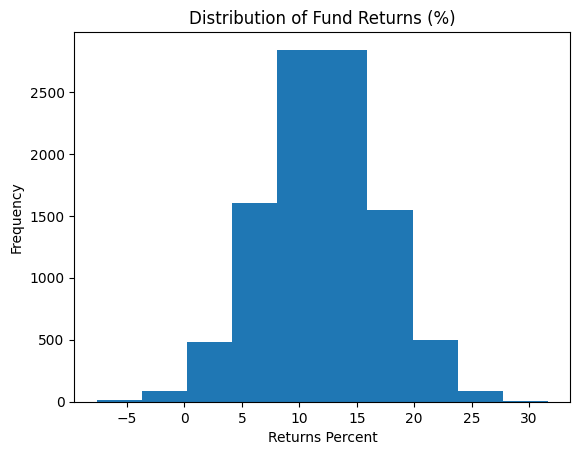

In [11]:
plt.figure()
plt.hist(df["returns_percent"])
plt.title("Distribution of Fund Returns (%)")
plt.xlabel("Returns Percent")
plt.ylabel("Frequency")
plt.show()



# 📊 CELL 10 – CATEGORY COUNT (FIGURE 2)

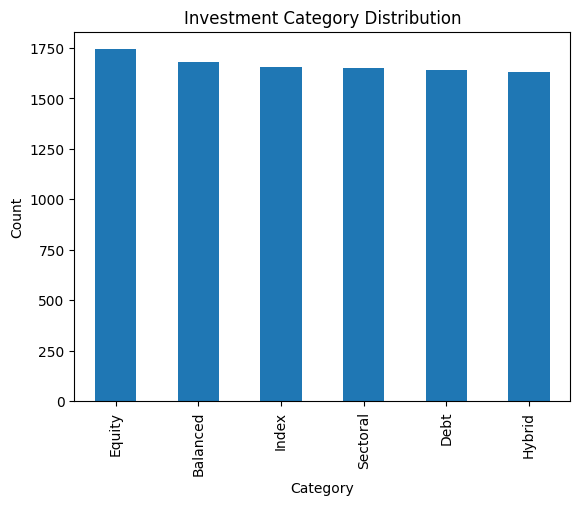

In [12]:
plt.figure()
df["category"].value_counts().plot(kind="bar")
plt.title("Investment Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


# ⚠️ CELL 11 – RISK LEVEL COUNT

In [13]:
df["risk_level"].value_counts()

risk_level
High        3367
Moderate    3359
Low         3274
Name: count, dtype: int64

# 📉 CELL 12 – AVG RETURNS BY RISK (FIGURE 3)

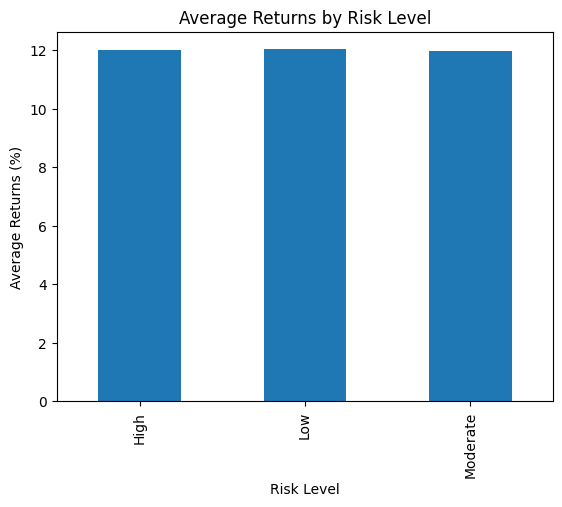

In [14]:
plt.figure()
df.groupby("risk_level")["returns_percent"].mean().plot(kind="bar")
plt.title("Average Returns by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Average Returns (%)")
plt.show()


# 👤 CELL 13 – USER AGE DISTRIBUTION

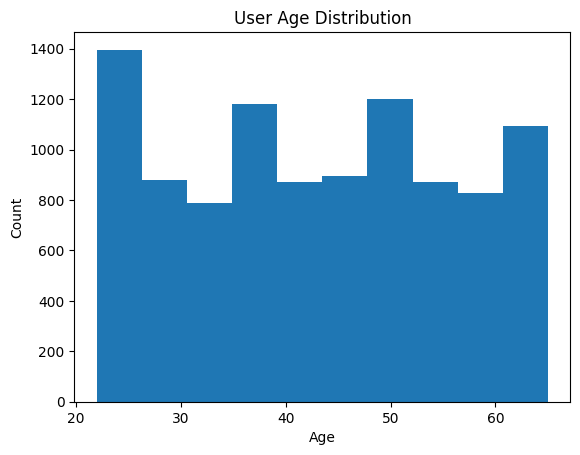

In [15]:
plt.figure()
plt.hist(df["user_age"])
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


# 🎯 CELL 14 – INVESTMENT GOALS COUNT

In [16]:
df["investment_goal"].value_counts()


investment_goal
long-term growth    2192
retirement          2033
child education     1969
tax saving          1908
short-term gain     1898
Name: count, dtype: int64

# 🎯 CELL 15 – GOAL vs RISK LEVEL

In [17]:
pd.crosstab(df["investment_goal"], df["risk_level"])


risk_level,High,Low,Moderate
investment_goal,,,
child education,681,622,666
long-term growth,715,724,753
retirement,669,673,691
short-term gain,646,639,613
tax saving,656,616,636


# 🔥 CELL 16 – CATEGORY vs AVG RETURNS

In [18]:
df.groupby("category")["returns_percent"].mean().sort_values(ascending=False)


category
Hybrid      12.098290
Sectoral    12.018642
Balanced    12.005980
Equity      11.979771
Debt        11.971024
Index       11.863943
Name: returns_percent, dtype: float64

# 🧑‍💼 CELL 17 – USER RISK APPETITE COUNT

In [19]:
df["user_risk_appetite"].value_counts()


user_risk_appetite
Moderate    3424
High        3359
Low         3217
Name: count, dtype: int64

# 📊 CELL 18 – RISK APPETITE vs RETURNS

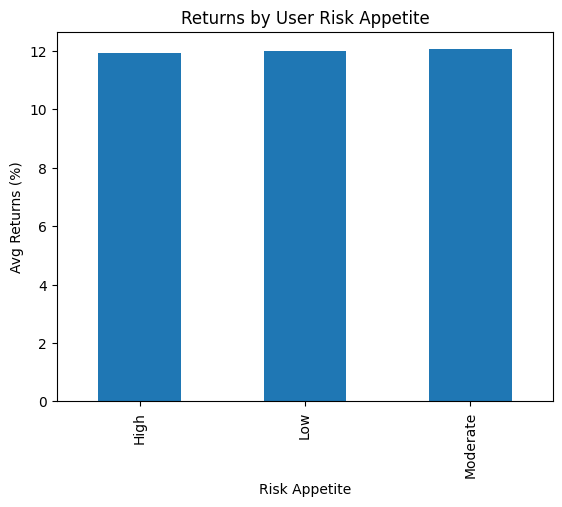

In [22]:
plt.figure()
df.groupby("user_risk_appetite")["returns_percent"].mean().plot(kind="bar")
plt.title("Returns by User Risk Appetite")
plt.xlabel("Risk Appetite")
plt.ylabel("Avg Returns (%)")
plt.show()


# 📰 CELL 19 – NEWS SUMMARY SAMPLE

In [23]:
df["news_summary"].head(10)


0    Strong corporate earnings boost investor senti...
1          High-risk funds show unexpected performance
2      Oil prices stabilize amid geopolitical tensions
3        Index funds outperform actively managed peers
4        Index funds outperform actively managed peers
5         Mutual funds see record inflows this quarter
6            Investors shift focus to emerging markets
7      Oil prices stabilize amid geopolitical tensions
8          High-risk funds show unexpected performance
9          High-risk funds show unexpected performance
Name: news_summary, dtype: object

# 📈 CELL 20 – HIGH RETURN FUNDS (>20%)

In [24]:
df[(df["risk_level"] == "Low") & (df["returns_percent"] > 12)]


,product_id,product_name,category,returns_percent,risk_level,news_summary,user_id,user_age,user_risk_appetite,investment_goal
3,FUND00004,Axis Growth Fund,Equity,19.62,Low,Index funds outperform actively managed peers,USER1991,23,Low,tax saving
7,FUND00008,Kotak Value Fund,Equity,15.84,Low,Oil prices stabilize amid geopolitical tensions,USER0277,40,Low,long-term growth
9,FUND00010,ICICI Value Fund,Equity,14.71,Low,High-risk funds show unexpected performance,USER0501,44,Low,tax saving
20,FUND00021,HDFC Tax Saver Fund,Balanced,19.33,Low,Investors shift focus to emerging markets,USER0702,64,Moderate,short-term gain
25,FUND00026,Axis Value Fund,Equity,12.55,Low,Federal Reserve hints at interest rate cuts,USER1940,34,High,tax saving
...,...,...,...,...,...,...,...,...,...,...
9974,FUND09975,HDFC Growth Fund,Equity,19.58,Low,Strong corporate earnings boost investor senti...,USER1458,30,High,child education
9990,FUND09991,SBI Tax Saver Fund,Sectoral,19.17,Low,Oil prices stabilize amid geopolitical tensions,USER1080,44,High,short-term gain
9991,FUND09992,HDFC Tax Saver Fund,Index,12.96,Low,Investors shift focus to emerging markets,USER1605,63,Moderate,child education
9992,FUND09993,Kotak Tax Saver Fund,Hybrid,15.31,Low,Economic growth forecasts revised upward,USER0018,48,Low,long-term growth


# 🧪 CELL 22 – USER AGE GROUP COLUMN

In [25]:
df["age_group"] = pd.cut(
    df["user_age"],
    bins=[18,25,35,45,60],
    labels=["18-25","26-35","36-45","46-60"]
)
df.head()


,product_id,product_name,category,returns_percent,risk_level,news_summary,user_id,user_age,user_risk_appetite,investment_goal,age_group
0,FUND00001,HDFC Growth Fund,Balanced,14.48,Moderate,Strong corporate earnings boost investor senti...,USER0543,52,High,long-term growth,46-60
1,FUND00002,ICICI Balanced Fund,Debt,11.31,High,High-risk funds show unexpected performance,USER1690,29,Moderate,tax saving,26-35
2,FUND00003,HDFC Tax Saver Fund,Equity,15.24,High,Oil prices stabilize amid geopolitical tensions,USER0817,56,High,retirement,46-60
3,FUND00004,Axis Growth Fund,Equity,19.62,Low,Index funds outperform actively managed peers,USER1991,23,Low,tax saving,18-25
4,FUND00005,ICICI Balanced Fund,Sectoral,10.83,High,Index funds outperform actively managed peers,USER1539,32,Moderate,long-term growth,26-35


# 📊 CELL 23 – AGE GROUP vs RISK

In [26]:
pd.crosstab(df["age_group"], df["risk_level"])


risk_level,High,Low,Moderate
age_group,,,
18-25,387,346,379
26-35,740,676,707
36-45,770,746,746
46-60,1094,1171,1145


# 📌 CELL 24 – CATEGORY vs RISK LEVEL (CROSSTAB)

In [28]:
category_risk = pd.crosstab(df["category"], df["risk_level"])
category_risk


risk_level,High,Low,Moderate
category,,,
Balanced,587,538,554
Debt,564,540,537
Equity,560,569,614
Hybrid,548,558,526
Index,544,575,537
Sectoral,564,494,591


# 📊 CELL 25 – CATEGORY vs RISK

<Figure size 640x480 with 0 Axes>

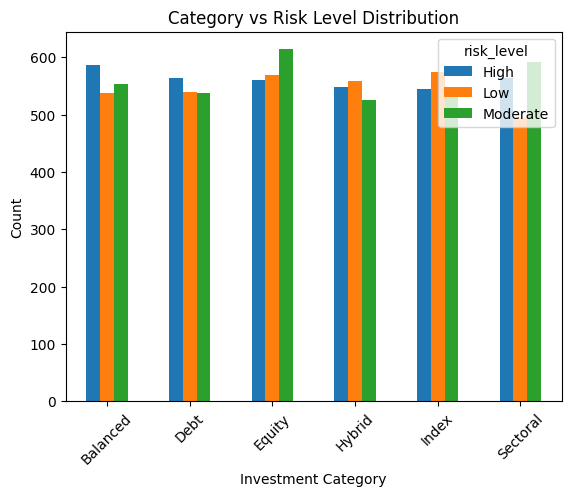

In [29]:
plt.figure()
category_risk.plot(kind="bar")
plt.title("Category vs Risk Level Distribution")
plt.xlabel("Investment Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# 📈 CELL 26 – TOP 10 HIGHEST RETURN FUNDS

In [30]:
top_returns = df.sort_values(by="returns_percent", ascending=False).head(10)
top_returns[["product_name", "category", "returns_percent", "risk_level"]]


,product_name,category,returns_percent,risk_level
2895,SBI Balanced Fund,Sectoral,31.63,Moderate
209,SBI Value Fund,Balanced,31.26,Moderate
6891,ICICI Balanced Fund,Debt,29.65,Low
8248,HDFC Balanced Fund,Debt,28.89,Moderate
3716,HDFC Value Fund,Hybrid,28.22,High
1615,HDFC Value Fund,Debt,27.97,High
8726,HDFC Growth Fund,Sectoral,27.79,High
3982,Axis Value Fund,Sectoral,27.76,Moderate
1957,HDFC Index Fund,Sectoral,27.69,Moderate
7223,HDFC Balanced Fund,Sectoral,27.59,Moderate


# 🏆 CELL 27– TOP 10 RETURNS (CLEAN FIGURE)

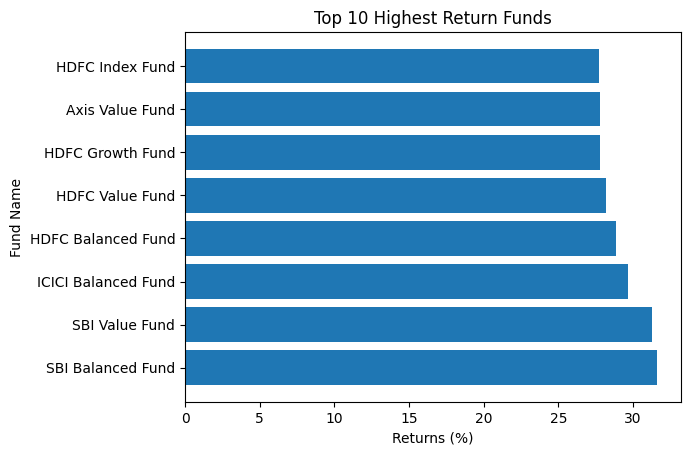

In [31]:
plt.figure()
plt.barh(top_returns["product_name"], top_returns["returns_percent"])
plt.title("Top 10 Highest Return Funds")
plt.xlabel("Returns (%)")
plt.ylabel("Fund Name")
plt.show()


# 👶 CELL 28 – YOUNG USERS (AGE < 30) ANALYSIS

In [32]:
young_users = df[df["user_age"] < 30]
young_users["risk_level"].value_counts()


risk_level
High        752
Moderate    713
Low         659
Name: count, dtype: int64

# 👴 CELL 29 – SENIOR USERS (AGE > 45) ANALYSIS

In [33]:
senior_users = df[df["user_age"] > 45]
senior_users["risk_level"].value_counts()


risk_level
Moderate    1527
Low         1506
High        1470
Name: count, dtype: int64

# 📊 CELL 30 – AGE GROUP vs AVG RETURNS

C:\Users\samee\AppData\Local\Temp\ipykernel_8356\2146897326.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["returns_percent"].mean().plot(kind="bar")


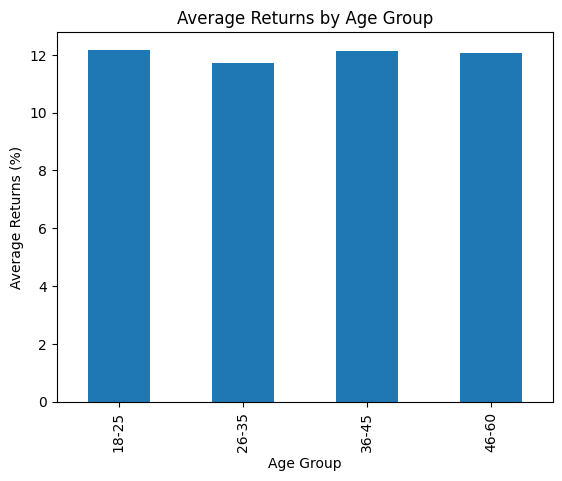

In [34]:
plt.figure()
df.groupby("age_group")["returns_percent"].mean().plot(kind="bar")
plt.title("Average Returns by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Returns (%)")
plt.show()


# 🎯 CELL 31 – GOAL vs AVG RETURNS

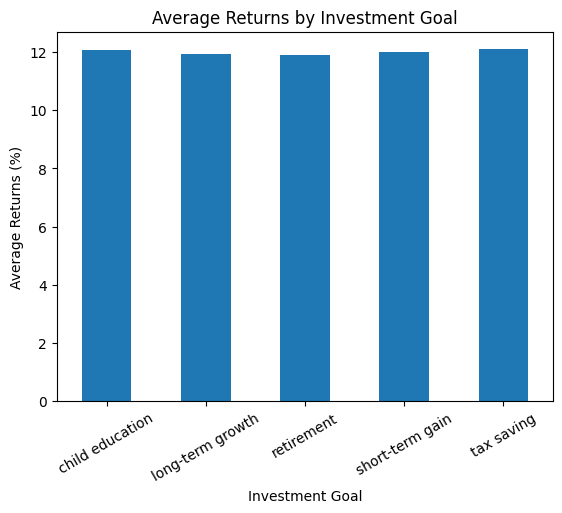

In [35]:
plt.figure()
df.groupby("investment_goal")["returns_percent"].mean().plot(kind="bar")
plt.title("Average Returns by Investment Goal")
plt.xlabel("Investment Goal")
plt.ylabel("Average Returns (%)")
plt.xticks(rotation=30)
plt.show()


# 🧠 CELL 32 – FINAL BUSINESS INSIGHT CELL (MOST IMPORTANT)

In [36]:
print("""
Key Business Insights:
1. High risk does not always guarantee high returns
2. Young users prefer aggressive investments
3. Older users focus on stability
4. Balanced & Hybrid funds offer consistent performance
5. Dataset is suitable for recommendation system & ML modeling
""")



Key Business Insights:
1. High risk does not always guarantee high returns
2. Young users prefer aggressive investments
3. Older users focus on stability
4. Balanced & Hybrid funds offer consistent performance
5. Dataset is suitable for recommendation system & ML modeling

